In [6]:
import numpy as np
x = np.asarray([0.90055164, 0.43474907])
y = np.asarray([0.92847669, 0.37139068])
print(np.dot(x,y))

0.9976029586179392


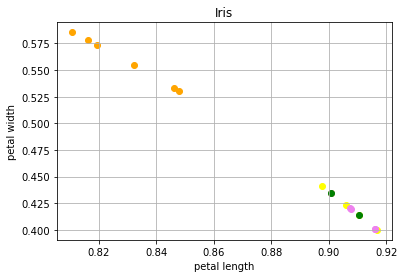

In [ ]:
import matplotlib.pyplot as plt

colours = {0:'orange', 1:'yellow', 2:'violet'}

colours2 = {0:'red', 1:'green', 2:'blue'}


for i in range(len(train_datas)):
    plt.scatter(train_datas[i][0], train_datas[i][1], color = colours[train_labels[i]])
for i in range(len(test_datas)):
    plt.scatter(test_datas[i][0], test_datas[i][1], color = colours2[test_labels[i]])
plt.title('Iris')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.grid(True)
plt.show()
